<a href="https://colab.research.google.com/github/NewtonSawitta/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [130]:
import pandas as pd

In [131]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#ใช้ data กรมอุตุ

In [132]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/Group6_2กาญจนสุดา_16วรรณนภา_21เกลิดา_31ศิริขวัญ.csv')
weather_data.head(5)

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [133]:
data_features = weather_data.iloc[:,5:]
data_features.head(5)

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,83,3,9,1.4,24.2,27.6,24.8
1,92,2,10,17.7,24.0,25.6,23.0
2,86,3,10,3,22.9,25.6,22.1
3,80,2,8,0,21.9,25.8,22.8
4,86,2,10,2.2,21.7,24.3,23.1


In [134]:
data_features.dtypes

ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด         object
dtype: object

In [135]:
data_features.describe()

,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000
mean,69.798262,18.151916,24.868405
std,8.870501,3.775475,2.846185
min,38.000000,1.500000,11.800000
25%,64.000000,15.800000,23.300000
50%,69.000000,18.400000,25.300000
75%,75.000000,21.000000,27.000000
max,99.000000,28.400000,31.000000


In [137]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int)

ValueError: ignored

In [138]:
data_features[data_features.eq('-').any(1)]

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
305,78,4,4,-,23.5,27.9,24.3
306,73,2,2,-,21.9,27.5,23.7
307,69,3,3,-,20.7,27.3,22.5
308,72,5,5,-,21.3,27.1,22.8
309,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...
8134,72,1,-,0,15.6,23.9,15.0
8135,73,2,-,0,15.7,23.2,15.0
8140,74,2,1,-,15.2,22.6,-
8161,68,1,-,0,15.2,23.2,14.0


In [139]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
305,ขอนแก่น,3,10,2013,1009.88,78,4,4,-,23.5,27.9,24.3
306,ขอนแก่น,4,10,2013,1009.47,73,2,2,-,21.9,27.5,23.7
307,ขอนแก่น,5,10,2013,1008.08,69,3,3,-,20.7,27.3,22.5
308,ขอนแก่น,6,10,2013,1008.35,72,5,5,-,21.3,27.1,22.8
309,ขอนแก่น,7,10,2013,1009.30,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8134,เลย,25,1,2021,1011.66,72,1,-,0,15.6,23.9,15.0
8135,เลย,26,1,2021,1011.62,73,2,-,0,15.7,23.2,15.0
8140,เลย,31,1,2021,1015.28,74,2,1,-,15.2,22.6,-
8161,เลย,21,2,2021,1013.57,68,1,-,0,15.2,23.2,14.0


In [140]:
weather_data[weather_data['ความเร็วลม'].eq('-')] #เลือกเฉพาะ column (ใส่ชื่อ column แล้วลบ any ออก)

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
1079,ขอนแก่น,21,10,2018,1012.65,87,-,-,53.3,23.5,25.8,24.5
1122,ขอนแก่น,3,12,2018,1011.47,61,-,-,-,19.7,28.5,22.7
1773,นครพนม,18,1,2012,1008.50,73,-,4,0,20.2,25.6,20
1776,นครพนม,21,1,2012,1009.51,89,-,7,1.2,22.0,24.2,21.1
1856,นครพนม,10,11,2012,1009.45,73,-,4,0,23.9,29.7,24.9
1862,นครพนม,16,11,2012,1011.50,70,-,6,0,21.0,27.5,22.2
1927,นครพนม,20,1,2013,1015.58,65,-,2,0,15.0,22.7,15.3
1995,นครพนม,29,10,2013,1014.22,67,-,1,-,19.4,26.5,20.6
2063,นครพนม,5,1,2014,1013.33,68,-,-,-,14.0,21.0,-
2125,นครพนม,8,10,2014,1011.17,72,-,8,0,21.3,27.1,23.0


In [141]:
data_features_d = data_features[data_features.eq('-').any(1)==False]

In [142]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,83,3,9,1.4,24.2,27.6,24.8
1,92,2,10,17.7,24.0,25.6,23.0
2,86,3,10,3,22.9,25.6,22.1
3,80,2,8,0,21.9,25.8,22.8
4,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...
8164,69,1,0,0,18.4,26.8,18.0
8165,61,1,0,0,17.3,27.8,19.5
8166,55,2,0,0,13.0,26.3,16.0
8167,56,1,2,0,13.8,25.2,15.3


In [143]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [144]:
data_features_d.describe()

,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,70.438253,2.284726,3.308832,1.556194,18.420944,25.002667,19.933570
std,9.433792,1.209540,2.494353,6.816712,3.630472,2.720534,3.295887
min,38.000000,0.000000,0.000000,0.000000,1.500000,11.800000,6.800000
25%,64.000000,1.000000,1.000000,0.000000,16.100000,23.500000,17.900000
50%,69.000000,2.000000,3.000000,0.000000,18.500000,25.400000,20.300000
75%,77.000000,3.000000,5.000000,0.000000,21.200000,26.900000,22.500000
max,99.000000,10.000000,10.000000,112.400000,28.400000,31.000000,26.700000


In [145]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[9,9] #กำหนดขนาดของ figure

In [146]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s

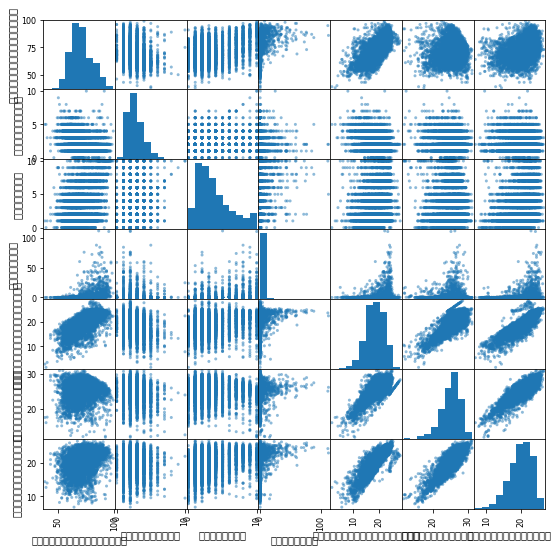

In [147]:
pd.plotting.scatter_matrix(data_features_d);

In [148]:
from sklearn import preprocessing

In [149]:
scaler = preprocessing.StandardScaler()
data_features_d_s = scaler.fit_transform(data_features_d)

In [150]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_s = scaler.transform(data_features_d)

In [151]:
data_features_d_s

array([[ 1.33170074,  0.5914187 ,  2.28184617, ...,  1.59197655,
         0.95480871,  1.47666181],
       [ 2.28581221, -0.23542385,  2.68279133, ...,  1.53688186,
         0.21958617,  0.93047261],
       [ 1.64973789,  0.5914187 ,  2.68279133, ...,  1.23386103,
         0.21958617,  0.65737801],
       ...,
       [-1.63664607, -0.23542385, -1.32666027, ..., -1.49332646,
         0.47691406, -1.19359649],
       [-1.53063368, -1.06226641, -0.52476995, ..., -1.27294767,
         0.07254167, -1.4060034 ],
       [-1.31860891, -1.06226641, -0.92571511, ..., -0.88728479,
         0.21958617, -1.19359649]])

In [152]:
import numpy as np

(array([   6.,   37.,  213.,  750., 1325., 1252.,  628.,  528.,  250.,
          72.]),
 array([-3.43885663, -2.79218107, -2.14550552, -1.49882996, -0.85215441,
        -0.20547886,  0.4411967 ,  1.08787225,  1.7345478 ,  2.38122336,
         3.02789891]),
 <a list of 10 Patch objects>)

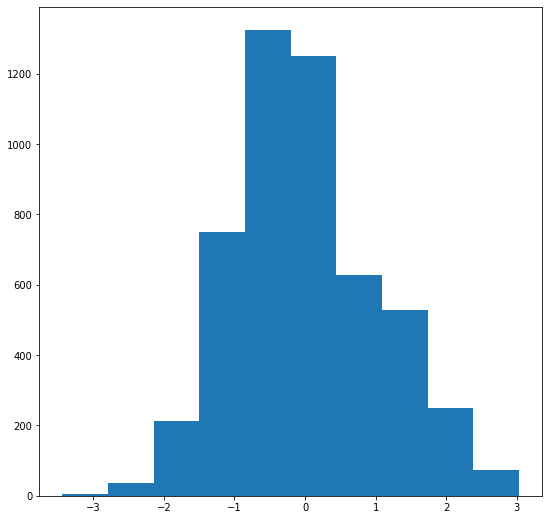

In [153]:
plt.hist(data_features_d_s[:,0])

Min-max normalization

In [154]:
#define
scaler = preprocessing.MinMaxScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_norm = scaler.transform(data_features_d)

KeyError: ignored

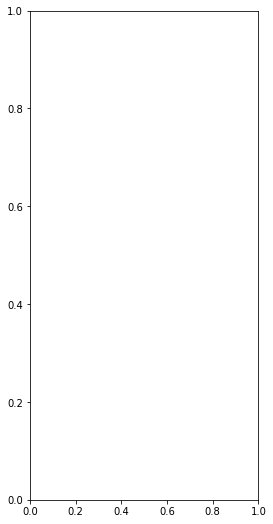

In [155]:
plt.subplot(1,2,1)
plt.hist(data_features['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0])
plt.subplot(1,3,3)
plt.hist(data_features_d_notm[:,0]);

#Discretization

In [156]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/11สวิตตา สมศรี.csv')
home_data.head(3)

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,project_name,district,zone,street,sell_price
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,1.0,กันยารัตน์ เดอวินเทจ,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,1.0,จันทร์ประเสริฐแกรนด์,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0


In [157]:
home_data = home_data.dropna(subset=['sell_price'])

In [158]:
home_data.shape

(100, 17)

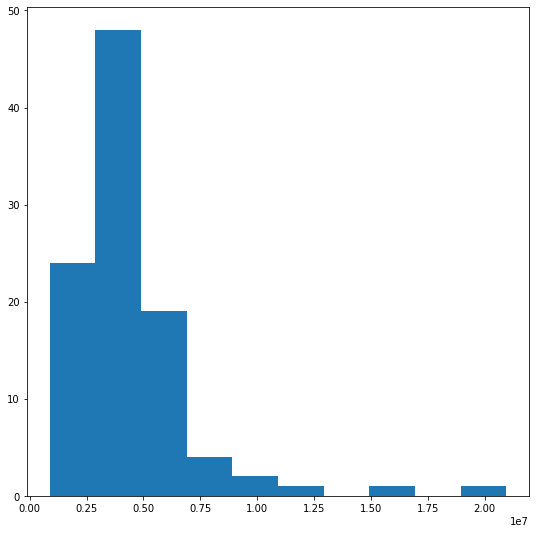

In [159]:
plt.hist(home_data['sell_price']);

###แปลงค่า sell_price 
- ราคาต่ำกว่า 500k ให้เป็น 1
- ราคาระหว่าง 500k-1m ให้เป็น 2
- ราคา 1m ขึ้นไป ให้เป็น 3

In [160]:
home_data['sell_price']

0     2700000.0
1     2600000.0
2     5900000.0
3     4400000.0
4     2750000.0
        ...    
95    5500000.0
96    7911000.0
97    2990000.0
98    4000000.0
99    1375000.0
Name: sell_price, Length: 100, dtype: float64

In [161]:
home_data[home_data['sell_price']<5000000] = 1
home_data[(home_data['sell_price']>5000000)  &  (home_data['sell_price']<10000000)] = 2
home_data[home_data['sell_price']>10000000] = 3

In [162]:
home_data['sell_price']

0     1.0
1     1.0
2     2.0
3     1.0
4     1.0
     ... 
95    2.0
96    2.0
97    1.0
98    1.0
99    1.0
Name: sell_price, Length: 100, dtype: float64

In [163]:
home_data

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,project_name,district,zone,street,sell_price
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1.0
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2.0
3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1.0
4,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2.0
96,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2.0
97,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1.0
98,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1.0
